# Density analysis for Buenos Aires

In [1]:
import sys
sys.path.append("../") 
import databasepopulation
import communicationwmongo as commu
import home_location as home
import analysis as a
import pymongo
import my_h3_functions as myh3
import geopandas as gpd
import pandas as pd
from h3 import h3
import datetime
import os, inspect
import matplotlib.pyplot as plt

In [42]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

In [17]:
tracts.columns

Index(['cod_radio', 'formula', 'varon', 'mujer', 'totalpobl', 'hogares',
       'viviendasp', 'viv_part_h', 'departamen', 'cod_munici', 'municipio',
       'urbano', 'rural', 'rural_agru', 'rural_disp', 'tipo', 'cloc_urb',
       'nom_urb', 'cloc_agrup', 'nom_agrup', 'cloc_dispe', 'nom_disper',
       'localidad', 'geometry'],
      dtype='object')

In [2]:
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
tracts = gpd.read_file(currentdir+'/../data/radios_amba_2010.shp')
#tracts=tracts.to_crs({'init': 'epsg:4326'})


In [6]:
crs_ciudad={'proj': 'tmerc',
 'lat_0': -34.6297166,
 'lon_0': -58.4627,
 'k': 0.999998,
 'x_0': 100000,
 'y_0': 100000,
 'ellps': 'intl',
 'units': 'm',
 'no_defs': True}


In [7]:
tracts2=tracts.to_crs(crs_ciudad)

/home/rickhunter/miniconda3/envs/twitteranalysis/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [10]:
tracts2['surface']=tracts2['geometry'].area / 10**6

In [12]:
tracts2['density']=tracts2['totalpobl']/tracts2['surface']

# Density in the Province of Buenos Aires

Because the distribution of density in the province is highly skewed and concentrated, a cloropleth graph does not capture variability

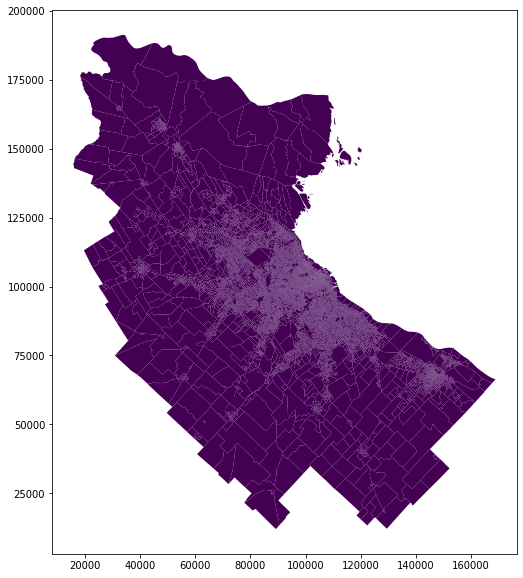

In [34]:
tracts2.plot('density')

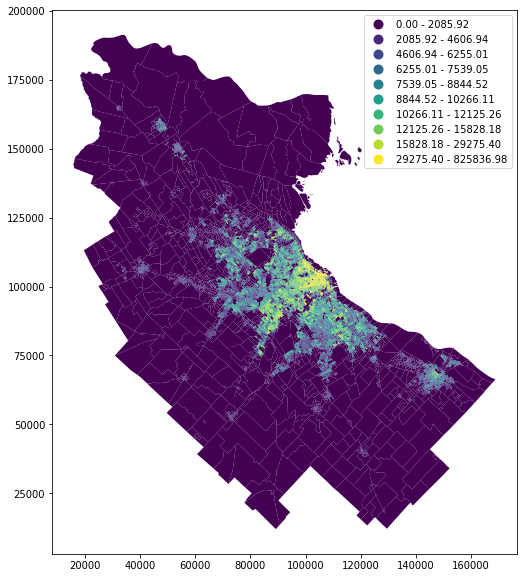

In [35]:
fig, ax = plt.subplots(1, 1)
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)
#tracts2.loc[tracts2.localidad=='CABA'].plot('density', ax=ax, legend=True, cax=cax)
tracts2.plot(column='density', scheme='Quantiles',ax =ax,  k=10, figsize=(16, 9), legend=True)

In [36]:
tracts2.density.describe()

count     15124.000000
mean      12874.082216
std       16228.908696
min           0.000000
25%        5501.774740
50%        8844.524669
75%       13526.422261
max      825836.984412
Name: density, dtype: float64

Densities above 2000 per sq km captures the shape of the urban agglomerate 

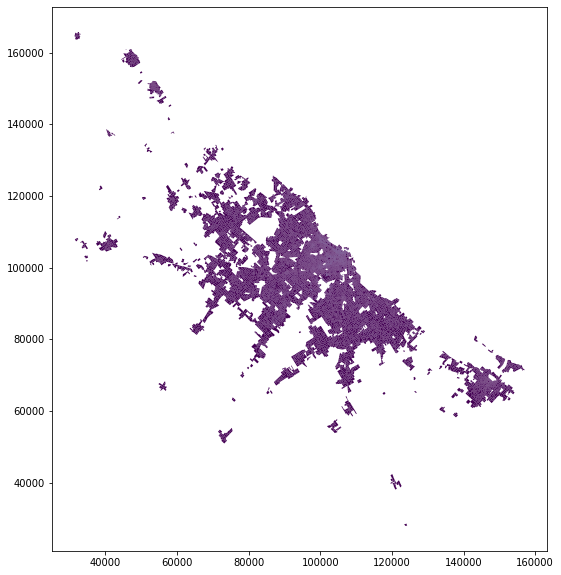

In [39]:
tracts2.loc[tracts2.density>2000].plot('density')

In [41]:
tracts2.loc[tracts2.density>2000].density.describe()

count     13650.000000
mean      14184.393736
std       16557.651897
min        2001.727781
25%        6566.318852
50%        9516.145948
75%       14399.766801
max      825836.984412
Name: density, dtype: float64

In [76]:
tracts2.loc[tracts2.localidad=='CABA'].density.describe()

count      3555.000000
mean      27483.623086
std       19299.467973
min           0.000000
25%       13158.730657
50%       21697.915747
75%       38139.560540
max      163630.946302
Name: density, dtype: float64

# City of Buenos Aires

Text(0.5, 1, 'Density in the City of Buenos Aires. Population per square kilometer. By Deciles')

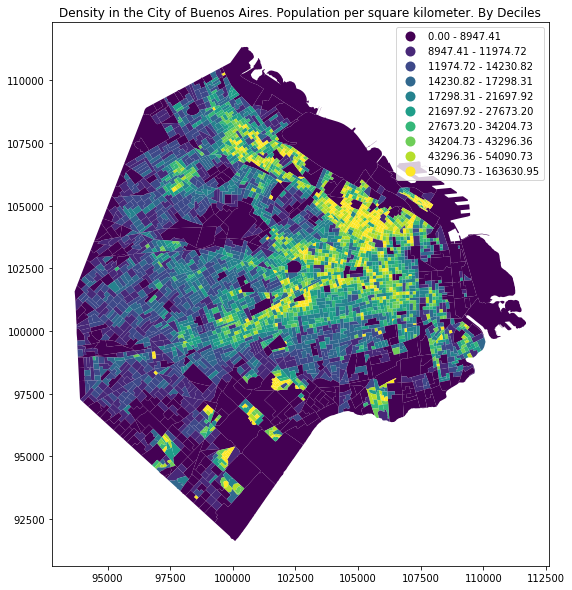

In [28]:
fig, ax = plt.subplots(1, 1)
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)
#tracts2.loc[tracts2.localidad=='CABA'].plot('density', ax=ax, legend=True, cax=cax)
tracts2.loc[(tracts2.localidad=='CABA')].plot(column='density', scheme='Quantiles',ax =ax,  k=10, figsize=(16, 9), legend=True)
plt.title('Density in the City of Buenos Aires. Population per square kilometer. By Deciles')

Text(0.5, 1, 'Density in the City of Buenos Aires. Population per square kilometer. By Deciles. Less than 500 excluded')

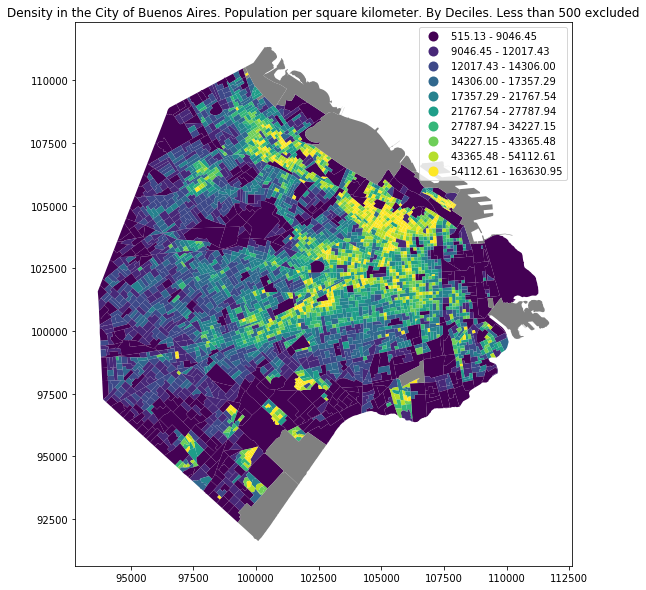

In [26]:
fig, ax = plt.subplots(1, 1)
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)
#tracts2.loc[tracts2.localidad=='CABA'].plot('density', ax=ax, legend=True, cax=cax)
tracts2.loc[(tracts2.localidad=='CABA')&(tracts2.density>500)].plot(column='density', scheme='Quantiles',ax =ax,  k=10, figsize=(16, 9), legend=True)
tracts2.loc[(tracts2.localidad=='CABA')&(tracts2.density<500)].plot(ax=ax, legend=True, color='gray')
plt.title('Density in the City of Buenos Aires. Population per square kilometer. By Deciles. Less than 500 excluded')

Text(0.5, 1, 'Density in the City of Buenos Aires. Population per square kilometer')

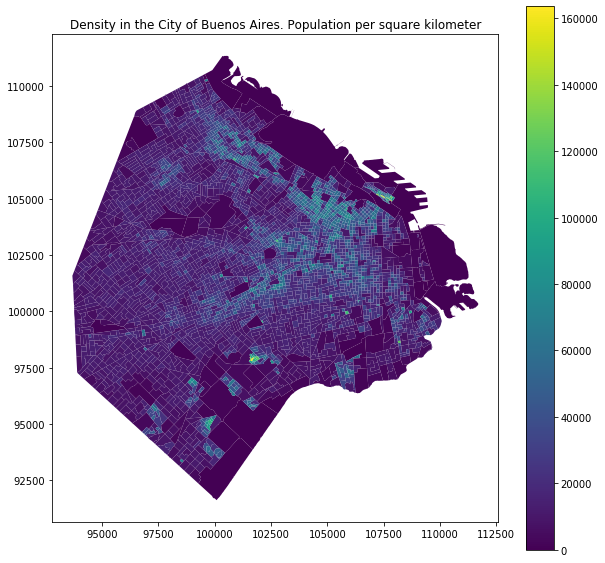

In [33]:
fig, ax = plt.subplots(1, 1)
tracts2.loc[tracts2.localidad=='CABA'].plot('density', legend=True, ax=ax)
plt.title('Density in the City of Buenos Aires. Population per square kilometer')
# Population per km square


Text(0.5, 1.0, 'Density in the City of Buenos Aires. Population per square kilometer')

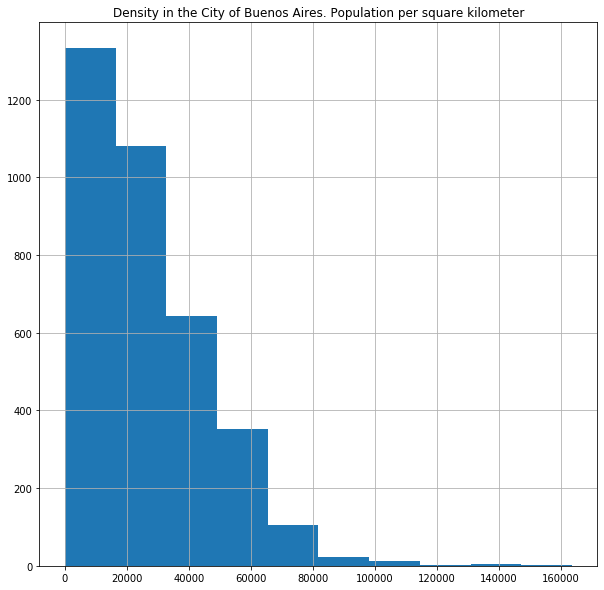

In [30]:
fig, ax = plt.subplots(1, 1)
tracts2.loc[tracts2.localidad=='CABA'].density.hist(ax=ax)
plt.title('Density in the City of Buenos Aires. Population per square kilometer')

In [31]:
tracts2.loc[tracts2.localidad=='CABA'].density.describe()

count      3555.000000
mean      27483.623086
std       19299.467973
min           0.000000
25%       13158.730657
50%       21697.915747
75%       38139.560540
max      163630.946302
Name: density, dtype: float64

### Total surface of the city of Buenos Aires

In [66]:
tracts2.loc[tracts2.localidad=='CABA'].surface.sum()

203.85242274641104

# Gentrification Typologies for Buenos Aires

In [45]:

typologies=pd.read_excel(currentdir+'/../data/tipologias/'+'tipologias.xlsx')

typologies.loc[typologies['TYPE']=='GDV','TYPE' ]="Low Income, Undergoing Change"
typologies.loc[typologies['TYPE']=='GD','TYPE']="Low Income, Undergoing Change"
typologies.loc[typologies['TYPE']=='GV','TYPE']="Low Income, Undergoing Change"
typologies.loc[typologies['TYPE']=='G','TYPE']="Low Income, Undergoing Change"
typologies.loc[typologies['TYPE']=='DV','TYPE']="Low Income, Undergoing Change"
typologies.loc[typologies['TYPE']=='D','TYPE']="Low Income, Undergoing Change"
typologies.loc[typologies['TYPE']=='VE','TYPE']="Exclusive Dynamic"
typologies.loc[typologies['TYPE']=='V','TYPE']="Low Income, At Risk of Change"
typologies.loc[typologies['TYPE']=='E','TYPE']="Exclusive Static"


#dfcentroids=dfcentroids.merge(typologies[['COD_2010','TYPE']], left_on='cod_radio', right_on='COD_2010')

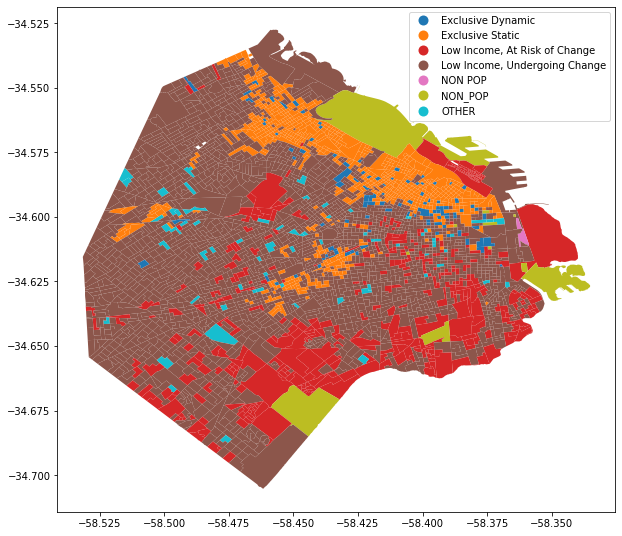

In [52]:
#tracts.columns
tracts.merge(typologies[['COD_2010','TYPE']], left_on='cod_radio', right_on='COD_2010').plot('TYPE', legend=True)